# Simple Statistics
* Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.

In [1]:
import pandas as pd
df = pd.read_csv("Data/default of credit card clients.csv")

In [17]:
df = df.drop(columns=['ID'])
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The table above shows the simple statistics for all the variables in the data set. We can see that the average person is 35 years old woman, who graduated school and pays her bills in time.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
# find the percentage of people who were default
percentDefault = float(len(df[df.Default != 0]))/len(df) * 100
print (percentDefault)

22.12


The percentage of people who were default in the data set is 22.12% and it matches the calculation from the data frame describe() function in the table above.

In [18]:
df.groupby(by=df.Default).mean()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
Default,,,,,,,,,,,,,,,,,,,,,
0,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


In [20]:
(130109.65-178099.72)/178099.72

-0.26945617881937156

The amount of the given credit (LIMIT_BAL) for people, who default payment next month, is lower by 26.94% compering with those, who Not default payment next month. History of past payment in the above table (PAY_0 - PAY_6) confirms the ability to pay in time for peple who are not fail to make payment next month.

In [19]:
df.groupby(by=df.EDUCATION).mean()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
EDUCATION,,,,,,,,,,,,,,,,,,,,,
0,217142.857143,1.428571,1.714286,38.857143,-0.500000,-1.000000,-0.928571,-0.857143,-1.071429,-1.357143,...,13350.214286,7409.071429,5272.928571,5945.785714,13030.928571,8825.142857,3620.571429,2541.714286,3007.214286,0.000000
1,212956.069910,1.588663,1.652338,34.231838,-0.233916,-0.408125,-0.425886,-0.461974,-0.479074,-0.485971,...,42931.065187,40388.891261,38668.076051,6780.933585,7306.622201,6560.585735,5804.565612,5776.562211,6422.554842,0.192348
2,147062.437634,1.616964,1.523022,34.722096,0.102210,0.022523,-0.018532,-0.083036,-0.141411,-0.170848,...,44748.779758,41588.566287,40431.943835,5080.463293,5106.711333,4556.800000,4375.387313,4452.678689,4716.487028,0.237349
3,126550.270490,1.595282,1.421192,40.299980,0.132805,0.040879,0.002644,-0.066504,-0.139313,-0.183649,...,38718.582266,35957.469392,34704.597315,4866.397397,5053.454139,3964.056742,3992.658532,3599.658938,3825.749034,0.251576
4,220894.308943,1.658537,1.601626,33.853659,-0.504065,-0.772358,-0.764228,-0.813008,-0.780488,-0.739837,...,39570.268293,33840.113821,32136.130081,5450.512195,6555.008130,9990.626016,5104.861789,5991.642276,4284.967480,0.056911
5,168164.285714,1.660714,1.475000,35.600000,-0.121429,-0.303571,-0.375000,-0.375000,-0.389286,-0.521429,...,62275.767857,53568.014286,46083.860714,5970.714286,8912.921429,7718.510714,4927.332143,4633.246429,7772.114286,0.064286
6,148235.294118,1.509804,1.490196,43.901961,-0.176471,-0.313725,-0.372549,-0.411765,-0.509804,-0.647059,...,54259.490196,44510.745098,39578.509804,9780.450980,6176.431373,7644.941176,5179.490196,11691.137255,14773.901961,0.156863


In [ ]:
The highest percent of default payment is 25.15% for people who graduated only a high school.

# Visualize Attributes
* 	Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

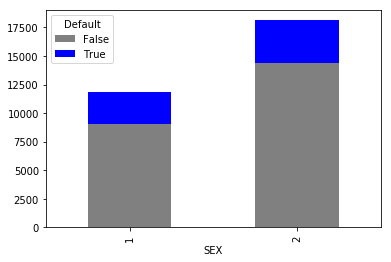

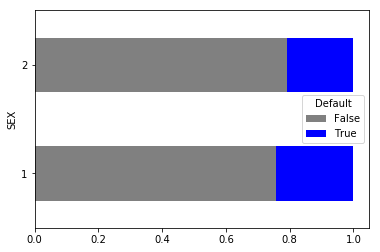

In [4]:
Default_counts = pd.crosstab([df['SEX']], df.Default.astype(bool))
Default_counts.plot(kind='bar', stacked=True, color=['grey','blue'])

# divide the counts to get rates
Default_rate = Default_counts.div(Default_counts.sum(1).astype(float),axis=0)
Default_rate.plot(kind='barh', stacked=True, color=['grey','blue'])

It is interesting that persent of default payments is higher for man than for female. On the plot above we see 20% of defaul payments which makes woman versus 25% which makes man. 

<bound method _AxesBase.set_yscale of <matplotlib.axes._subplots.AxesSubplot object at 0x00000245E8E5D550>>

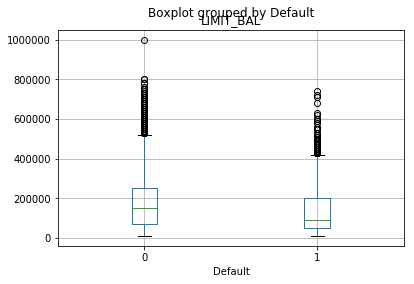

In [21]:
a = df.boxplot(column='LIMIT_BAL', by = 'Default')
a.set_yscale

The boxplot above confirms our finding that amount of the given credit (LIMIT_BAL) for people, who default payment next month, is lower by 26.94% compering with those, who Not default payment next month.

<bound method AxesSubplot.set_yscale of <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A68ECF8>>

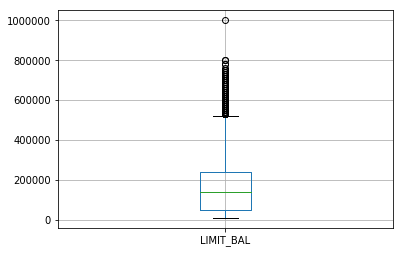

In [4]:
b = df.boxplot(column='LIMIT_BAL')
b.set_yscale

From the boxplot we see that for the 90% of the data max amount of the given credit is around $500,000. Observations with LIMIT_BAL higher than $500,000 are outliers. The medium LIMIT_BAL is around $120,000.

<bound method _AxesBase.set_yscale of <matplotlib.axes._subplots.AxesSubplot object at 0x00000245E9786C88>>

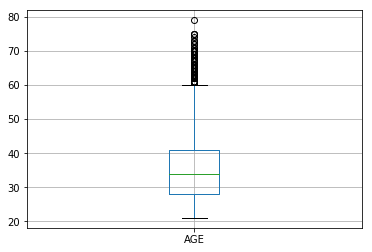

In [23]:
c = df.boxplot(column='AGE')
c.set_yscale   

90% of the ages is in the interval (21, 60). The rest observations with ages higher than 60 years are outliers. Mean age is 35 years. 

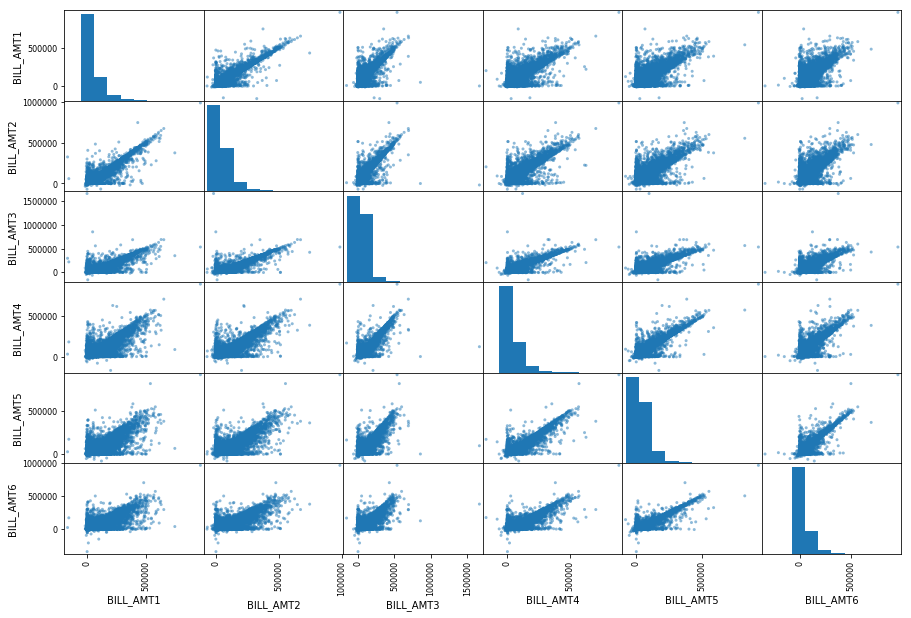

In [5]:
from pandas.plotting import scatter_matrix
ax=scatter_matrix(df[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]], figsize=(15,10))

We see on the scatter matrix high correlation between amounts of bill statements. All BILL_AMT distributions are right skewed.

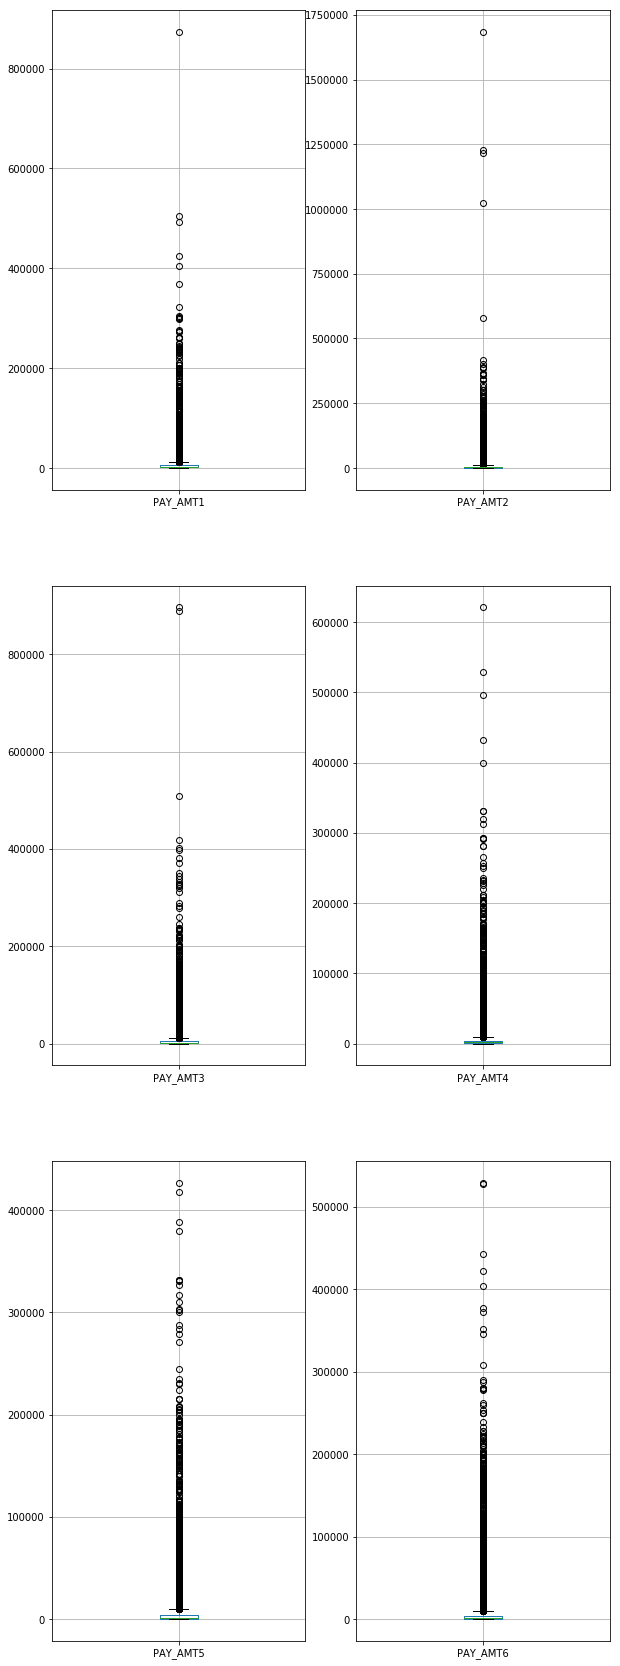

In [14]:
vars_to_plot_separate = [['PAY_AMT1'],['PAY_AMT2'],['PAY_AMT3'],['PAY_AMT4'],['PAY_AMT5'],['PAY_AMT6']]
plt.figure(figsize=(10,30))
for index, plot_vars in enumerate (vars_to_plot_separate):
    plt.subplot(len(vars_to_plot_separate)/2,
               2,
               index+1)
    ax=df.boxplot(column=plot_vars)
    
plt.show()



We see a lot of outliers in amounts of previous payments (PAY_AMT). 

Text(0.5,1,'PAY_AMT6 no outlier')

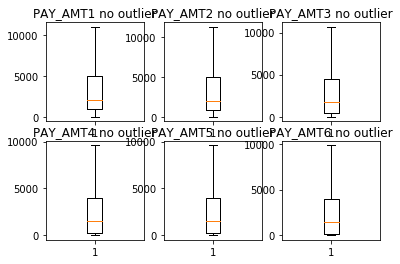

In [36]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].boxplot(df.PAY_AMT1, 0, '')
axs[0, 0].set_title("PAY_AMT1 no outlier")
axs[0, 1].boxplot(df.PAY_AMT2, 0, '')
axs[0, 1].set_title("PAY_AMT2 no outlier")
axs[0, 2].boxplot(df.PAY_AMT3, 0, '')
axs[0, 2].set_title("PAY_AMT3 no outlier")
axs[1, 0].boxplot(df.PAY_AMT4, 0, '')
axs[1, 0].set_title("PAY_AMT4 no outlier")
axs[1, 1].boxplot(df.PAY_AMT4, 0, '')
axs[1, 1].set_title("PAY_AMT5 no outlier")
axs[1, 2].boxplot(df.PAY_AMT6, 0, '')
axs[1, 2].set_title("PAY_AMT6 no outlier")

And from above plots it is clear that 90% of the payments are in the interval ($0, $10,000).

# PCA


In [178]:
df["log_LIMIT_BAL"]=np.log(df.LIMIT_BAL)
df["log_PAY_AMT1"]=np.log(df.PAY_AMT1+1)
df["log_PAY_AMT2"]=np.log(df.PAY_AMT2+1)
df["log_PAY_AMT3"]=np.log(df.PAY_AMT3+1)
df["log_PAY_AMT4"]=np.log(df.PAY_AMT4+1)
df["log_PAY_AMT5"]=np.log(df.PAY_AMT5+1)
df["log_PAY_AMT6"]=np.log(df.PAY_AMT6+1)

from sklearn.decomposition import PCA
pca=PCA(n_components=4)
X=df[['log_LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'log_PAY_AMT1','log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4', 'log_PAY_AMT5','log_PAY_AMT6']]
X_pca = pca.fit(X).transform(X)
print ('pca:', pca.components_)

pca: [[  1.82072365e-06   4.47584136e-01   4.41765411e-01   4.29686609e-01
    3.97979144e-01   3.69918767e-01   3.53063573e-01   6.69199565e-06
    6.94605205e-06   7.48699545e-06   7.87942983e-06   7.79690911e-06
    7.83768078e-06]
 [ -3.36391191e-07   5.53642823e-01   3.91611377e-01   7.51240163e-02
   -2.67274713e-01  -4.50579053e-01  -5.09920857e-01   4.57022076e-06
   -1.29278520e-06  -7.60193355e-06  -1.05517954e-05  -1.09800464e-05
   -7.43284675e-06]
 [ -1.42657603e-06  -4.49920270e-01  -3.35071473e-02   7.17866806e-01
    2.91213435e-01  -1.73749572e-01  -4.07580779e-01   5.45394684e-06
    1.85954127e-05   3.88365681e-06  -6.73941550e-06  -9.32576735e-06
   -3.24824575e-06]
 [ -4.45743980e-07  -1.92812760e-01   1.68834826e-01   4.13771338e-01
   -7.06454730e-01  -1.56148804e-01   4.89541199e-01   6.18075806e-06
    5.90076772e-06  -2.24234453e-05   5.05479320e-06   2.06556973e-05
    5.94049376e-06]]


In [179]:
from sklearn.preprocessing import StandardScaler
features = ['log_LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'log_PAY_AMT1','log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4', 'log_PAY_AMT5','log_PAY_AMT6']
x = df.loc[:, features].values
y = df.loc[:,['Default']].values
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4',
                          'principal component 5','principal component 6', 'principal component 7' ])
principalDf.head()


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,-3.500827,2.365336,1.480592,0.362212,1.284113,0.873443,0.331434
1,-1.857898,0.154172,-0.510818,0.931328,1.141986,0.412477,-1.674209
2,-0.545440,-1.180344,0.045414,0.257409,0.025700,-0.222169,0.095423
3,0.000963,-0.737854,0.860512,0.156770,0.033502,-0.092137,0.117068
4,-0.225923,-1.794903,0.952715,-0.020841,0.571804,0.419759,-0.507973


In [180]:
finalDf = pd.concat([principalDf, df[['Default']]], axis = 1)

In [181]:
pca.explained_variance_ratio_

array([ 0.51460566,  0.15764278,  0.06993085,  0.05446773,  0.04516576,
        0.04217214,  0.03813215])

The explained variance tells us how much information (variance) can be attributed to each of the principal components. This is important as while we can convert 13 dimensional space to 7 dimensional space, we lose some of the variance (information) when we do this. By using the attribute explained_variance_ratio_, we can see that the first principal component contains 51.46% of the variance, the second principal component contains 15.76% of the variance and the third principal component contains 6.99% of the variance and so on. Together, the seven components contain 92.18% of the information.

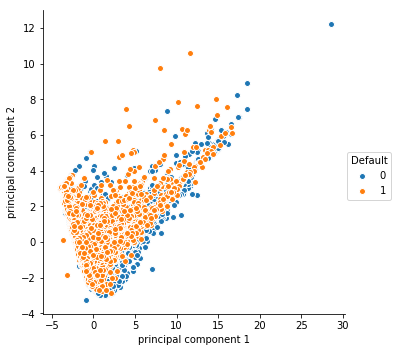

In [174]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.pairplot(x_vars=["principal component 1"], y_vars=["principal component 2"], data=finalDf, hue="Default", size=5)

Above scatterplot represents 67.21% of the continuus features variance just using first 2 principal components.